The data was provided in an Excel file. Part of the feature engineering has already been carried out. Therefore, not the entire feature engineering process can be traced using this code. 

In [ ]:

import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

# check the computer name and set the path accordingly
if os.environ['COMPUTERNAME'] == 'FYNN':            # name of surface PC
    sys.path.append(r'C:\Users\Surface\Masterarbeit')
elif os.environ['COMPUTERNAME'] == 'FYNNS-PC':  # desktop name
    sys.path.append(r'C:\Users\test\Masterarbeit')
    
else:
    raise ValueError("Unbekannter Computername: " + os.environ['COMPUTERNAME'])

from config import SAVE_PATH, RAW_DATA_PATH

Explore the data

In [2]:
prod_data_df = pd.read_excel(RAW_DATA_PATH)

#get some insights into the data
display(prod_data_df.describe())
display(prod_data_df.info())

# Check for categorial variables, i.e. variables with a low number of unique values
number_unique = prod_data_df.nunique(axis = 0).sort_values(ascending=False)
display(number_unique)

,TARGET,comp_param_1,comp_param_2,act_mach_param_1,act_mach_param_2,act_mach_param_3,act_mach_param_4,act_mach_param_5,act_mach_param_6,act_mach_param_7,...,targ_mach_param_2,targ_mach_param_5,targ_mach_param_6,diff_param_2,diff_param_1,diff_param_4,diff_param_7,diff_param_6,diff_param_5,diff_param_3
count,52011.000000,52011.000000,52011.000000,52011.000000,52011.000000,52011.000000,52011.000000,52011.000000,52011.000000,52011.000000,...,52011.0,52011.0,52011.0,52011.000000,52011.000000,52011.000000,52011.000000,52011.000000,52011.000000,52011.000000
mean,115.016787,158.090808,5.113822,0.007114,714.660706,5.746496,15.220163,1174.993286,149.991060,99.685453,...,700.0,1175.0,150.0,14.660706,-4.992886,-0.839988,0.141312,-0.008940,-0.006714,0.447313
std,7.621010,94.643462,3.175299,0.188466,2.803613,0.066397,0.812128,0.069341,0.040801,5.485681,...,0.0,0.0,0.0,2.803613,0.188466,1.019962,2.005914,0.040801,0.069341,0.068352
min,59.203040,1.000000,0.000000,0.000000,700.000000,4.800000,8.000000,1174.900000,149.900000,83.400000,...,700.0,1175.0,150.0,0.000000,-5.000000,-9.000000,-18.200000,-0.100000,-0.100000,0.000000
25%,110.602900,77.000000,2.000000,0.000000,713.000000,5.700000,14.400000,1174.900000,150.000000,101.300000,...,700.0,1175.0,150.0,13.000000,-5.000000,-2.100000,0.000000,0.000000,-0.100000,0.400000
50%,114.982600,152.000000,5.000000,0.000000,713.000000,5.700000,14.900000,1175.000000,150.000000,101.600000,...,700.0,1175.0,150.0,13.000000,-5.000000,-0.200000,0.000000,0.000000,0.000000,0.400000
75%,120.784900,237.000000,8.000000,0.000000,717.000000,5.800000,15.800000,1175.000000,150.000000,102.100000,...,700.0,1175.0,150.0,17.000000,-5.000000,-0.100000,0.300000,0.000000,0.000000,0.500000
max,140.684000,349.000000,14.000000,5.000000,725.000000,6.000000,17.100000,1175.100000,150.100000,102.800000,...,700.0,1175.0,150.0,25.000000,0.000000,3.400000,3.000000,0.100000,0.100000,0.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52011 entries, 0 to 52010
Data columns (total 77 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TARGET             52011 non-null  float64
 1   comp_param_1       52011 non-null  int64  
 2   comp_param_2       52011 non-null  int64  
 3   act_mach_param_1   52011 non-null  int64  
 4   act_mach_param_2   52011 non-null  int64  
 5   act_mach_param_3   52011 non-null  float64
 6   act_mach_param_4   52011 non-null  float64
 7   act_mach_param_5   52011 non-null  float64
 8   act_mach_param_6   52011 non-null  float64
 9   act_mach_param_7   52011 non-null  float64
 10  targ_mach_param_3  52011 non-null  float64
 11  targ_mach_param_4  52011 non-null  float64
 12  targ_mach_param_7  52011 non-null  float64
 13  env_param_36       52011 non-null  int64  
 14  env_param_1        52011 non-null  int64  
 15  env_param_16       52011 non-null  int64  
 16  env_param_2        520

None

Index(['TARGET', 'comp_param_1', 'comp_param_2', 'act_mach_param_1',
       'act_mach_param_2', 'act_mach_param_3', 'act_mach_param_4',
       'act_mach_param_5', 'act_mach_param_6', 'act_mach_param_7',
       'targ_mach_param_3', 'targ_mach_param_4', 'targ_mach_param_7',
       'env_param_36', 'env_param_1', 'env_param_16', 'env_param_2',
       'env_param_17', 'env_param_18', 'env_param_19', 'env_param_20',
       'env_param_21', 'env_param_22', 'env_param_23', 'env_param_24',
       'env_param_25', 'env_param_26', 'env_param_27', 'env_param_28',
       'env_param_29', 'env_param_30', 'env_param_31', 'env_param_32',
       'env_param_3', 'env_param_33', 'env_param_4', 'env_param_34',
       'env_param_5', 'env_param_35', 'env_param_6', 'env_param_7',
       'env_param_8', 'env_param_9', 'env_param_10', 'env_param_11',
       'env_param_12', 'env_param_13', 'env_param_14', 'env_param_15',
       'time_param_1', 'time_param_2', 'time_param_3', 'time_param_4',
       'time_param_5', 'ti

env_param_14         494
comp_param_1         349
env_param_13         318
env_param_12         290
env_param_8          279
                    ... 
diff_param_1           2
targ_mach_param_1      1
targ_mach_param_5      1
targ_mach_param_6      1
targ_mach_param_2      1
Length: 77, dtype: int64

Separate Target from the independet feauter

Distribution of the target value

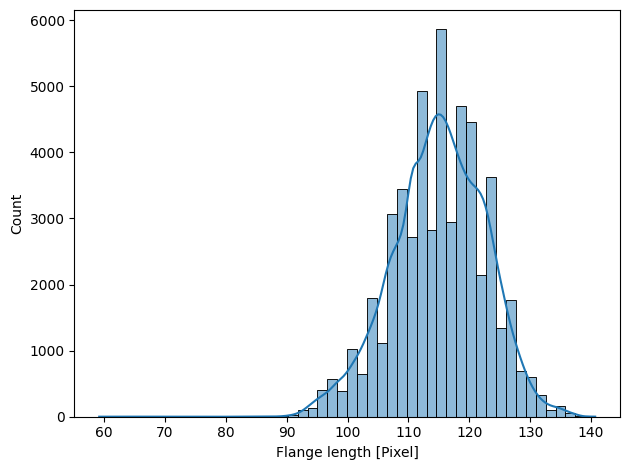

Mean: 115.01678661206284
std deviation: 7.621009653638579


In [18]:
# separate features and target variable
X = prod_data_df.drop(columns=["TARGET"])
y = prod_data_df["TARGET"] 

# plot the target data distribution
sns.histplot(y, bins=50, kde=True)
plt.xlabel('Flange length [Pixel]')  # Ändere hier die X-Achsen-Beschriftung
plt.tight_layout()
plt.savefig(os.path.join(SAVE_PATH, "Target distribution.svg"), format ='svg')
plt.show()
print(f'Mean: {y.mean()}')
print(f'std deviation: {y.std()}')

Korrelation of the environmental feature

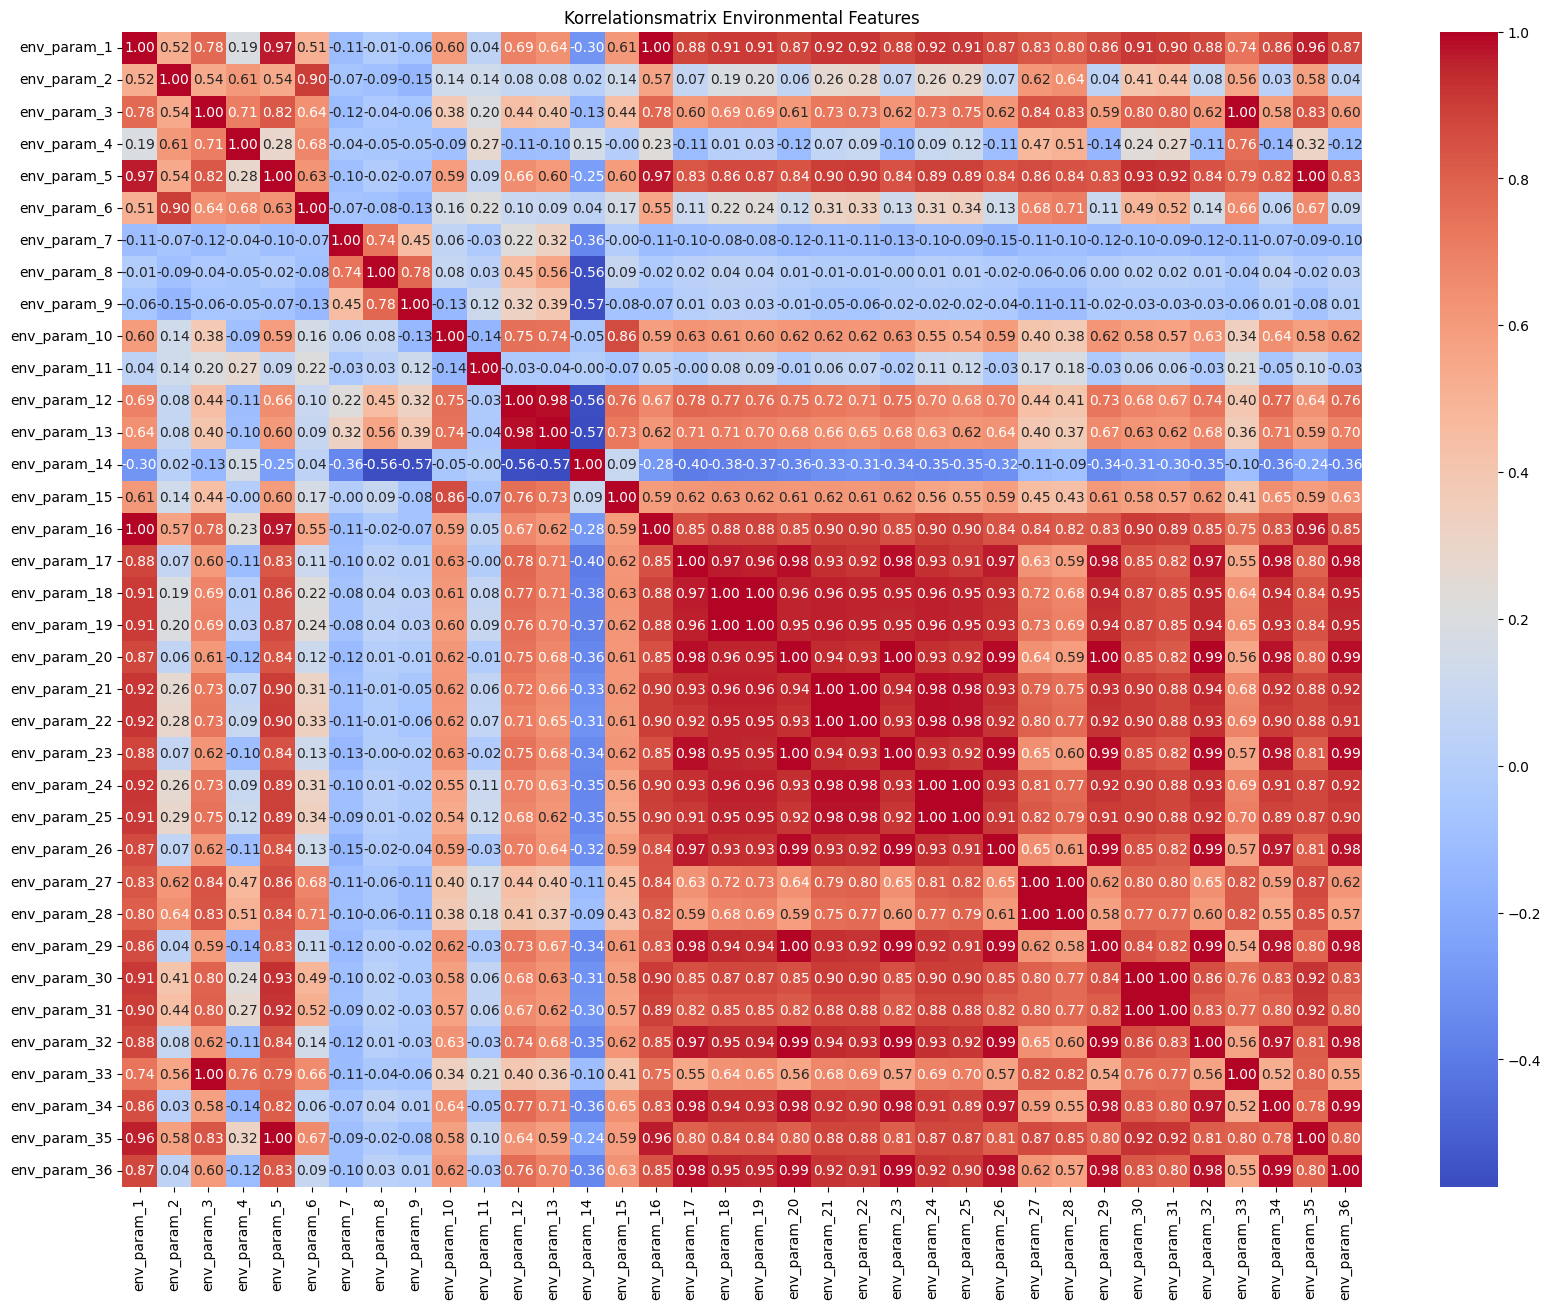

In [ ]:
df_env = X[[
            'env_param_1', 'env_param_2','env_param_3', 'env_param_4', 
            'env_param_5', 'env_param_6', 'env_param_7','env_param_8', 
            'env_param_9', 'env_param_10', 'env_param_11', 'env_param_12', 
            'env_param_13', 'env_param_14', 'env_param_15', 'env_param_16',
            'env_param_17', 'env_param_18', 'env_param_19', 'env_param_20',
            'env_param_21', 'env_param_22', 'env_param_23', 'env_param_24',
            'env_param_25', 'env_param_26', 'env_param_27', 'env_param_28',
            'env_param_29', 'env_param_30', 'env_param_31', 'env_param_32',
            'env_param_33', 'env_param_34', 'env_param_35', 'env_param_36'
            ]]

corr_env = df_env.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_env, annot=True, cmap='coolwarm',  fmt='.2f')
plt.title('Korrelationsmatrix Environmental Features')
plt.savefig(os.path.join(SAVE_PATH, "Environmental Features correlation matrix.svg"), format ='svg')
plt.show()

# Drop Env_param 16 to 36
X_1 = X.drop(columns=['env_param_16',
                        'env_param_17', 'env_param_18', 'env_param_19', 'env_param_20',
                        'env_param_21', 'env_param_22', 'env_param_23', 'env_param_24',
                        'env_param_25', 'env_param_26', 'env_param_27', 'env_param_28',
                        'env_param_29', 'env_param_30', 'env_param_31', 'env_param_32',
                        'env_param_33', 'env_param_34', 'env_param_35', 'env_param_36'
                        ])

Filter for Feature Selection

F_Regression for linear Relationship:

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression

Mutual information for any Relationship:

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.


In [ ]:
# both methods are used to determine the importance of each feature in relation to the target variable
# calculate the F-values and p-values for each feature
# f_regression returns the F-values and p-values for each feature
f_vals, p_vals = f_regression(X_1, y)

# calculate the mutual information scores for each feature
mi_vals = mutual_info_regression(X_1, y, n_jobs = -1)

# get the feature names
feature_names = X_1.columns

# create a dataframe with the feature names and the mutual information scores and f-values
feature_scores_MI = pd.DataFrame({
    'Feature': feature_names,
    'Mutual Information': mi_vals,
})
feature_scores_F = pd.DataFrame({
    'Feature': feature_names,
    'F_value': f_vals,
    'P_value': p_vals
})

# sort the feature scores by mutual information and F-value
feature_scores_MI_sorted = feature_scores_MI.sort_values(by='Mutual Information', ascending=False)
feature_scores_F_sorted = feature_scores_F.sort_values(by='F_value', ascending=False)

# merge the two dataframes on the feature names to get a combined view of the feature importance
feature_scores = pd.merge(feature_scores_MI_sorted, feature_scores_F_sorted, on='Feature')

# list to store features with low scores
low_feature_scores =[]
# identify features with low mutual information and F-value
for i, row in feature_scores.iterrows():
    if row['Mutual Information'] < 0.03 and row['F_value'] < 10:
        low_feature_scores.append(row['Feature'])
        
# Drop the non informative features  
X_2 = X_1.drop(columns=low_feature_scores)